In [1]:
# from model import classification_m
from data.data import data_preprocessing, load_pretrained_embedding, apply_tokenizer

from models.model import LSTM_model as lstm_model, cov_classification, LSTM_model_not_pre
from utility.utility import plot_confusion_matrix, plot_precision_recall_curve, plot_ROC, plot_data_balance, data_analysis, get_classification_report
import numpy as np
import tensorflow 
from tensorflow.keras.callbacks import TensorBoard


In [2]:
train_df_path = './labeledTrainData.tsv'
test_df_path = "./testData.tsv"
train_corpus, test_corpus, y_train, y_test = data_preprocessing(train_df_path, test_df_path)

(22504, 6)
value count of test data is: Rating
0    12499
1    10192
Name: count, dtype: int64
value count of test data is: Rating
0    12500
1    10004
Name: count, dtype: int64


d:\ML_task_IMDB_data\data\data.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"] = df["rating"].apply(lambda x: 1 if x > 7 else (0 if x < 5 else 2))
d:\ML_task_IMDB_data\data\data.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"] = df["Rating"].astype(int)


In [3]:
tokenizered_corpus, voc_length, tokenizer = apply_tokenizer(train_corpus)
tokenizered_corpus_test, voc_length_test, tokenizer_test = apply_tokenizer(test_corpus)

In [4]:
embedding_matrix, tokenizered_corpus, voc_length = load_pretrained_embedding('./glove.6B.50d.txt', train_corpus)
embedding_matrix_test, tokenizered_corpus_test, voc_length_test = load_pretrained_embedding('./glove.6B.50d.txt', test_corpus)

In [5]:
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [6]:
checkpoint_cb = tensorflow.keras.callbacks.ModelCheckpoint(
    "D:/ML_task_IMDB_data/classification.keras", save_best_only=True
)
early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

In [5]:
voc_length

69730

In [4]:
embedding_matrix.shape

NameError: name 'embedding_matrix' is not defined

In [4]:
model1 = LSTM_model_not_pre(voc_length, max_len = 200)

In [5]:
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            3486500   
                                                                 
 lstm (LSTM)                 (None, 60)                26640     
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 3513201 (13.40 MB)
Trainable params: 3513201 (13.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
model_cov = cov_classification(voc_length, embedding_matrix, max_len = 50)
print(model_cov.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            3486500   
                                                                 
 conv1d (Conv1D)             (None, 45, 20)            6020      
                                                                 
 global_max_pooling1d (Glob  (None, 20)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 3492541 (13.32 MB)
Trainable params: 6041 (23.60 KB)
Non-trainable params: 3486500 (13.30 MB)
_________________________________________________________________
None


In [7]:
model = lstm_model(voc_length, embedding_matrix, max_len = 50)
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            3486500   
                                                                 
 lstm (LSTM)                 (None, 60)                26640     
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 15)                915       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 3514071 (13.41 MB)
Trainable params: 2757

In [6]:
tokenizered_corpus.shape

(22504, 200)

In [ ]:
model_history1 = model1.fit(
    tokenizered_corpus,  # Training data
    y_train,             # Training labels
    batch_size=64,
    epochs=30,
    verbose=1,
    validation_split=0.3,  # Percentage of training data to use for validation
    # callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_callback]
)

In [12]:
model_history_cov = model_cov.fit(
    tokenizered_corpus,  # Training data
    y_train,             # Training labels
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_split=0.3,  # Percentage of training data to use for validation
    # callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_callback]
)


Epoch 1/10
247/247 [==============================] - 2s 10ms/step - loss: 0.5350 - accuracy: 0.7955 - val_loss: 0.5554 - val_accuracy: 0.7845
Epoch 2/10
247/247 [==============================] - 3s 11ms/step - loss: 0.5334 - accuracy: 0.7999 - val_loss: 0.5710 - val_accuracy: 0.7712
Epoch 3/10
247/247 [==============================] - 2s 7ms/step - loss: 0.5325 - accuracy: 0.7994 - val_loss: 0.5607 - val_accuracy: 0.7872
Epoch 4/10
247/247 [==============================] - 2s 7ms/step - loss: 0.5297 - accuracy: 0.8014 - val_loss: 0.6566 - val_accuracy: 0.7167
Epoch 5/10
247/247 [==============================] - 2s 8ms/step - loss: 0.5287 - accuracy: 0.8013 - val_loss: 0.5624 - val_accuracy: 0.7756
Epoch 6/10
247/247 [==============================] - 2s 8ms/step - loss: 0.5279 - accuracy: 0.8010 - val_loss: 0.6201 - val_accuracy: 0.7417
Epoch 7/10
247/247 [==============================] - 2s 9ms/step - loss: 0.5269 - accuracy: 0.8002 - val_loss: 0.6025 - val_accuracy: 0.7479
Epoc

In [6]:
model_history = model.fit(
    tokenizered_corpus,  # Training data
    y_train,             # Training labels
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_split=0.3,  # Percentage of training data to use for validation
    # callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_callback]
)


Epoch 1/10


247/247 [==============================] - 11s 33ms/step - loss: 0.5986 - accuracy: 0.6948 - val_loss: 0.5093 - val_accuracy: 0.7620
Epoch 2/10
247/247 [==============================] - 7s 29ms/step - loss: 0.4982 - accuracy: 0.7811 - val_loss: 0.4521 - val_accuracy: 0.7863
Epoch 3/10
247/247 [==============================] - 7s 30ms/step - loss: 0.4588 - accuracy: 0.8017 - val_loss: 0.4784 - val_accuracy: 0.7839
Epoch 4/10
247/247 [==============================] - 9s 35ms/step - loss: 0.4416 - accuracy: 0.8161 - val_loss: 0.4262 - val_accuracy: 0.8086
Epoch 5/10
247/247 [==============================] - 8s 34ms/step - loss: 0.4173 - accuracy: 0.8301 - val_loss: 0.4258 - val_accuracy: 0.7996
Epoch 6/10
247/247 [==============================] - 8s 34ms/step - loss: 0.3974 - accuracy: 0.8375 - val_loss: 0.4096 - val_accuracy: 0.8132
Epoch 7/10
247/247 [==============================] - 8s 33ms/step - loss: 0.3775 - accuracy: 0.8483 - val_loss: 0.4143 - val_accuracy: 0.8

In [12]:
model1.save_weights("./classification_without_pretraining.h5")

In [7]:
tokenizered_corpus_test.shape

(22691, 50)

In [13]:
score_cov = model1.predict(tokenizered_corpus_test)

710/710 [==============================] - 17s 22ms/step


In [8]:
score = model.predict(tokenizered_corpus_test)

710/710 [==============================] - 5s 6ms/step


In [14]:
y_pred = (score_cov > 0.5).astype(int)

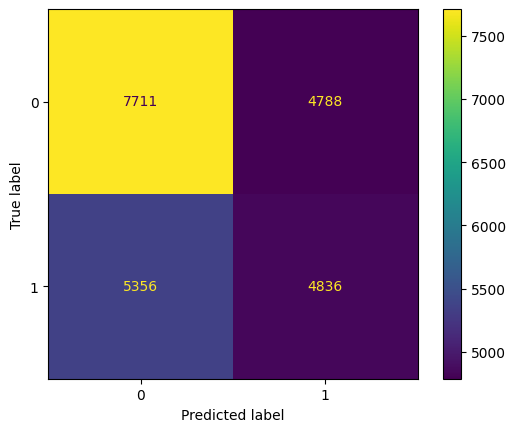

In [15]:
plot_confusion_matrix(y_test, y_pred)

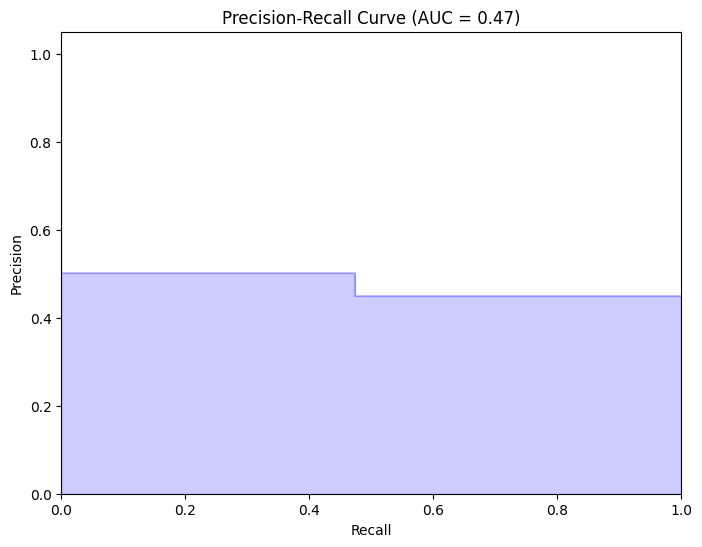

In [16]:
plot_precision_recall_curve(y_test, y_pred)

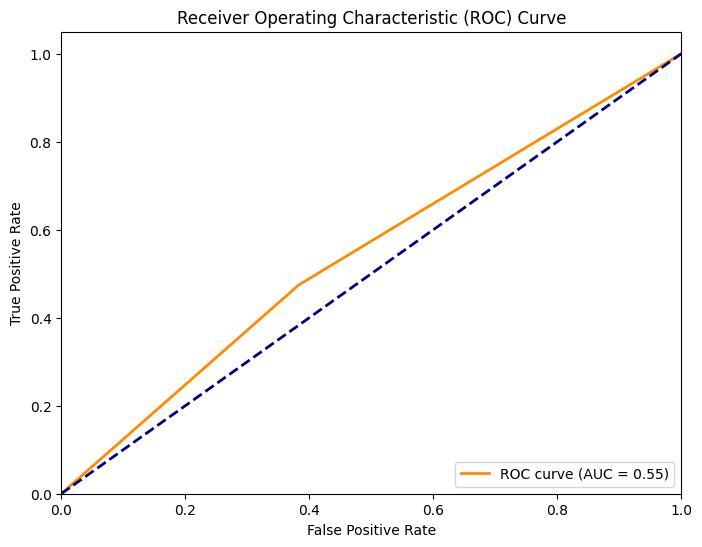

In [17]:
plot_ROC(y_test, y_pred)

In [18]:
a, b = get_classification_report(y_test, y_pred)

In [19]:
a

0.5529505090123837

In [20]:
print(b)

              precision    recall  f1-score   support

           0       0.59      0.62      0.60     12499
           1       0.50      0.47      0.49     10192

    accuracy                           0.55     22691
   macro avg       0.55      0.55      0.55     22691
weighted avg       0.55      0.55      0.55     22691



In [19]:
print(b)

              precision    recall  f1-score   support

           0       0.57      0.70      0.63     12499
           1       0.49      0.36      0.42     10192

    accuracy                           0.55     22691
   macro avg       0.53      0.53      0.52     22691
weighted avg       0.54      0.55      0.53     22691



In [21]:
import matplotlib.pyplot as plt

In [22]:
model_history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

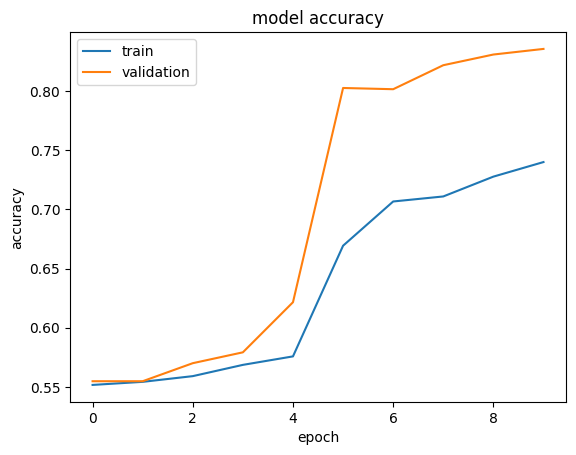

In [23]:
plt.plot(model_history1.history['accuracy'])
plt.plot(model_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

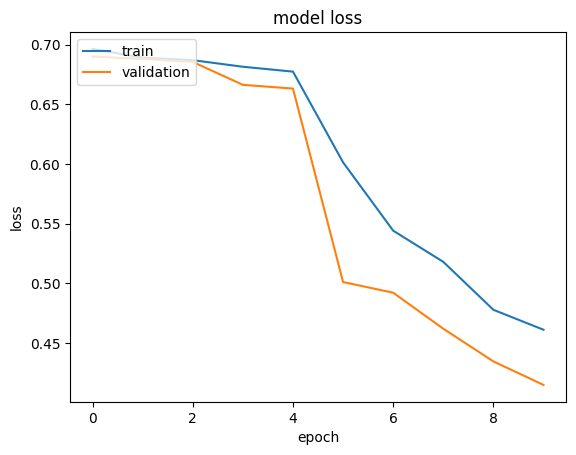

In [24]:
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()